<a href="https://colab.research.google.com/github/PrabuMadhavan/Information-Retrieval-and-Web-Mining/blob/main/Affinity_Analysis___Apriori_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Affinity Analysis (Market Basket Analysis)**

Affinity Analysis (or Market Basket Analysis) finds patterns to determine connections between purchases in order that stores can increase their cross-selling potential.

*Before we get into the detail, we’ll have to explain some terms.*

**İtemset**
As everyone knows, an itemset is a set of items that consist of two or more items.

**Transactions**
Transactions are the main data source of Affinity Analysis. Stores or retailers gather tremendous transaction data by recording activities over time. Each transaction is associated with a unique transaction ID (TID), and it contains subsets of itemsets.

**Support**
Support simply emphasizes how popular an itemset is. Support, despite being simple, is an important metric in the Affinity Analysis that used to determine the strength of association between items. Take 5 transactions, for instance. If you purchase bread in 3 transactions, you can tell the support of bread is equal to 3/5.

**Confidence**
While the support emphasizes how popular an itemset is, confidence denotes the likelihood of certain items are purchased together. For instance, how likely butter is purchased when item bread is purchased. 
Confidence is typically notated as Bread ⇒ Butter (Proportion of transactions containing Bread that also contain Butter). Its range is [0,1]. If the confidence of Bread ⇒ Butter is equal to 1, we can say every time a customer purchases bread, also purchases butter.

**Lift**
Like confidence, the lift is notated as Bread ⇒ Butter. It says how likely Butter is purchased when Bread is purchased while controlling for how popular Butter is.
Lift’s range is [0, +∞]. When lift equal to one, bread and butter are independent and, thus, no inferences can be made about butter when the bread is purchased. However, when the lift is greater than 1, it means that the butter is likely to be purchased together with bread.

**Conviction**
Wikipedia says “ conviction can be interpreted as the ratio of the expected frequency that X occurs without Y (that is to say, the frequency that the rule makes an incorrect prediction) if X and Y were independent divided by the observed frequency of incorrect predictions.” Conviction has the range [0,+∞]




**Simple Example**

In [1]:
my_basket=[['bread','butter','wine','bananas','coffee','carrots'],
          ['tomatoes','onions','cheese','milk','potatoes'],
          ['beer','chips','asparagus','salsa','milk','apples'],
          ['olive oil','bread','butter','tomatoes','steak','carrots'],
          ['tomatoes','onions','chips','wine','ketchup','orange juice'],
          ['bread','butter','beer','chips','milk'],
          ['butter','tomatoes','carrots','coffee','sugar'],
          ['tomatoes','onions','cheese','milk','potatoes'],
          ['bread','butter','ketchup','coffee','chicken wings'],
          ['butter','beer','chips','asparagus','apples'],
          ['tomatoes','onion','beer','chips','milk','coffee']]

In [3]:
def frequency_items (x,y):
    fx_=sum([x in i for i in my_basket])
    fy_=sum([y in i for i in my_basket])
    
    fxy_=sum([all(z in i for z in [x,y]) for i in my_basket])
    
    support=fxy_/len(my_basket)
    confidence = support/(fx_/len(my_basket))
    lift =confidence /(fy_/len(my_basket))
    if confidence ==1:
        conviction = 0
    else:
        conviction=(1-(fy_/len(my_basket)))/(1-confidence)
    
    print("Support = {}".format(round(support,2)))
    print("Confidence = {}".format(round(confidence,2)))
    print("Lift= {}".format(round(lift,2)))
    print("Conviction={}".format(round(conviction,2)))

In [4]:
frequency_items('bread','butter')

Support = 0.36
Confidence = 1.0
Lift= 1.83
Conviction=0


# **Apriori Algorithm**
The Apriori algorithm is a data mining technique for identifying the frequent itemsets and relevant association rules in the database. **Support, confidence and lift** are the three main components of the Apriori Algorithm.
Let’s illustrate the apriori algorithm using an example:

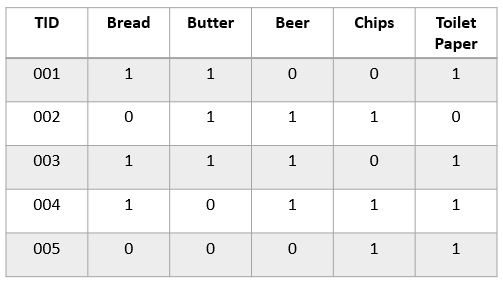

Step 1:
In the first step, we will create a frequency table of items in the transactions. Let us set the minimum support to 2.

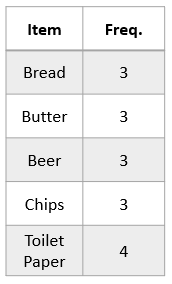

As you notice, all the items have greater support than the minimum support (2).

Step 2:

In this step, we will make all the possible pairs of items. (Order doesn’t matter, i.e {Bread,Butter} = {Butter, Bread})

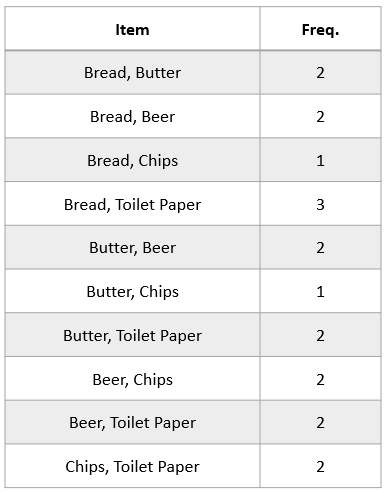

Again we need to compare these pairs with the minimum support(2).

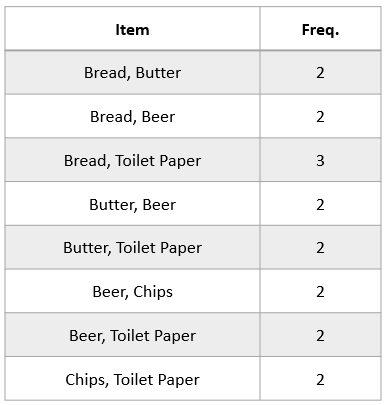

In [5]:
#Demo Program
#Loading the data
import csv

with open('groceries.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

In [6]:
#Importing packages and data preprocessing
import mlxtend.frequent_patterns 
import mlxtend.preprocessing

encode_=mlxtend.preprocessing.TransactionEncoder()
encode_arr=encode_.fit_transform(data)

print(encode_arr)

[[False False False ... False False False]
 [False False False ... False  True False]
 [False False False ...  True False False]
 ...
 [False False False ... False  True False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [8]:
#Converting to dataframe.
import pandas as pd
encode_df=pd.DataFrame(encode_arr, columns=encode_.columns_)
encode_df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,...,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,sound storage medium,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False,False,False,Fa

In [9]:
#Calculating support.
md=mlxtend.frequent_patterns.apriori(encode_df)
md_minsup=mlxtend.frequent_patterns.apriori(encode_df,
                                           min_support=0.01, 
                                            use_colnames=True)
md_minsup.head(20)

,support,itemsets
0,0.033452,(UHT-milk)
1,0.017692,(baking powder)
2,0.052466,(beef)
3,0.033249,(berries)
4,0.026029,(beverages)
5,0.080529,(bottled beer)
6,0.110524,(bottled water)
7,0.064870,(brown bread)
8,0.055414,(butter)
9,0.027961,(butter milk)


In [10]:
#Creating rules (Metric: Confidence) Antecedents ⇒ Consequents
rules=mlxtend.frequent_patterns.association_rules(
md_minsup, metric="confidence",min_threshold=0.06,support_only=False)

rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(beef),0.193493,0.052466,0.019725,0.101944,1.943066,0.009574,1.055095
1,(beef),(other vegetables),0.052466,0.193493,0.019725,0.375969,1.943066,0.009574,1.292416
2,(beef),(rolls/buns),0.052466,0.183935,0.013625,0.259690,1.411858,0.003975,1.102329
3,(rolls/buns),(beef),0.183935,0.052466,0.013625,0.074074,1.411858,0.003975,1.023337
4,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366
5,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628
6,(whole milk),(beef),0.255516,0.052466,0.021251,0.083168,1.585180,0.007845,1.033487
7,(beef),(whole milk),0.052466,0.255516,0.021251,0.405039,1.585180,0.007845,1.251315
8,(beef),(yogurt),0.052466,0.139502,0.011693,0.222868,1.597601,0.004374,1.107275
9,(yogurt),(beef),0.139502,0.052466,0.011693,0.083819,1.597601,0.004374,1.034222


In [11]:
#Creating rules (Metric: Lift) Antecedents ⇒ Consequents
rules2=mlxtend.frequent_patterns.association_rules(
md_minsup, metric="lift",min_threshold=0.06,support_only=False)

rules2.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(beef),0.193493,0.052466,0.019725,0.101944,1.943066,0.009574,1.055095
1,(beef),(other vegetables),0.052466,0.193493,0.019725,0.375969,1.943066,0.009574,1.292416
2,(beef),(rolls/buns),0.052466,0.183935,0.013625,0.259690,1.411858,0.003975,1.102329
3,(rolls/buns),(beef),0.183935,0.052466,0.013625,0.074074,1.411858,0.003975,1.023337
4,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366
5,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628
6,(whole milk),(beef),0.255516,0.052466,0.021251,0.083168,1.585180,0.007845,1.033487
7,(beef),(whole milk),0.052466,0.255516,0.021251,0.405039,1.585180,0.007845,1.251315
8,(beef),(yogurt),0.052466,0.139502,0.011693,0.222868,1.597601,0.004374,1.107275
9,(yogurt),(beef),0.139502,0.052466,0.011693,0.083819,1.597601,0.004374,1.034222


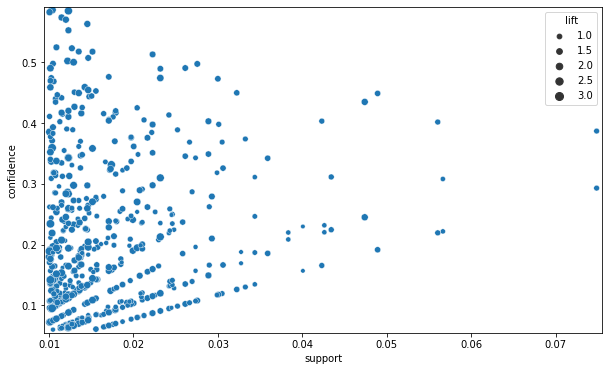

In [13]:
#Scatter plots help us to evaluate general tendencies of rules between antecedents and consequents.
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

# Generate scatterplot using support and confidence
plt.figure(figsize=(10,6))
sns.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = rules)
plt.margins(0.01,0.01)
plt.show()

Affinity Analysis or Market Basket Analysis is used to extract valuable insights from transaction data. It can be used to determine what products to discount. Also, it can increase sales and customer satisfaction. It is important to realize that there are many other areas in which it can be applied.

References:
https://www.kaggle.com/irfanasrullah/groceries
https://towardsdatascience.com/affinity-analysis-market-basket-analysis-c8e7fcc61a21